# ALGORITMO GENÉTICO PARA OTIMIZAR CAMPANHAS DE MARKETING

Uma empresa de comércio eletrônico quer maximizar o lucro de suas campanhas de marketing. Para isso, ela pode investir em diferentes canais de marketing: TikTok, Facebook, Instagram, Email Marketing, Influenciadores Digitais e YouTube.

Objetivo: Distribuir o orçamento de marketing de forma a maximizar o lucro, considerando o custo por conversão, o número esperado de conversões por $1000 e o lucro por conversão. TODOS OS DADOS SÃO FICTÍCIOS.

Neste código, implementei elitismo e crossover juntos. O elitismo foi feito para selecionar os n melhores indivíduos de uma geração x e passar automaticamente estes indivíduos para a próxima geração (x+1). No crossover, todos os indivíduos da geração x, inclusive os que foram selecionados para a próxima geração (x+1), participaram do sorteio para serem pais pelo método da roleta viciada. Assim, passo os melhores indivíduos para a próxima geração e ainda garanto no crossover poder ter genes bons de algum cromossomo que tem a maior parte dos genes ruins, ou seja, há maior diversidade por não eliminar os cromossomos "ruins" antes do crossover, permitindo preservar algumas características deles para as próximas gerações.

In [55]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Dados fictícios 
data = {
    'Canal': ['TikTok', 'Facebook', 'Instagram', 'Email Marketing', 'Influenciadores Digitais', 'YouTube'],
    'Custo por Conversão ($)': [55, 60, 70, 40, 100, 65],
    'Conversões Estimadas por $1000': [18, 17, 15, 25, 10, 16],
    'Receita Média por Conversão ($)': [80, 90, 100, 50, 150, 95],
    'Lucro Médio por Conversão ($)': [25, 30, 30, 10, 50, 30],
    'Orçamento Máximo Disponível ($)': [45000, 40000, 30000, 20000, 25000, 35000]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Exibir DataFrame
display(df)

,Canal,Custo por Conversão ($),Conversões Estimadas por $1000,Receita Média por Conversão ($),Lucro Médio por Conversão ($),Orçamento Máximo Disponível ($)
0,TikTok,55,18,80,25,45000
1,Facebook,60,17,90,30,40000
2,Instagram,70,15,100,30,30000
3,Email Marketing,40,25,50,10,20000
4,Influenciadores Digitais,100,10,150,50,25000
5,YouTube,65,16,95,30,35000


### Gera indivíduo

Os indivíduos serão listas com 6 valores (genes), cada um indicando os investimentos em um tipo de campanha de marketing.

In [56]:
def cromossomo(tamanho_crom):
    cromossomo = []
    while True:
        cromossomo = []
        for i in range(tamanho_crom):
            cromossomo.append(round(random.uniform(0,45000), 2))
            
        if cromossomo[0] <= 45000 and cromossomo[1] <=40000 and cromossomo[2] <=30000 and cromossomo[3] <=20000 and cromossomo[4] <=25000 and cromossomo[5] <=35000:
            return cromossomo

In [57]:
cromossomo(6)

[40365.05, 1466.85, 13205.34, 9669.5, 15870.26, 29184.1]

Gera população

In [58]:
def gerar_populacao(tamanho_pop, tamanho_crom):
    populacao = []

    for i in range(tamanho_pop):
        crom = cromossomo(tamanho_crom)
        populacao.append(crom)

    return populacao

In [59]:
gerar_populacao(10, 6)

[[38614.17, 30399.63, 20018.78, 14542.59, 18044.54, 17685.24],
 [36057.07, 35532.85, 4374.43, 18273.41, 14870.69, 13998.03],
 [3688.45, 20480.88, 20877.51, 3824.04, 2039.13, 10091.87],
 [43020.11, 31496.7, 25687.38, 8350.02, 446.97, 27633.78],
 [41483.92, 31521.89, 25364.97, 13399.19, 23130.98, 13345.66],
 [42598.09, 29838.21, 14754.48, 19523.87, 16441.77, 4265.43],
 [27868.73, 11482.23, 22719.3, 18641.33, 1140.86, 8015.14],
 [9067.69, 15505.0, 12192.56, 4771.27, 12221.49, 32218.78],
 [43520.73, 15054.65, 12568.0, 12265.91, 13643.3, 12527.02],
 [28990.73, 24921.19, 14305.97, 9210.23, 19513.75, 11357.17]]

Função fitness

In [60]:
def fitness(cromossomo):
    lucro = 0

    if cromossomo[0] > 45000 or cromossomo[1] > 40000 or cromossomo[2] > 30000 or cromossomo[3] > 20000 or cromossomo[4] > 25000 or cromossomo[5] > 35000:
        return 1
    else:
        for indice, valor in enumerate(cromossomo):
            lucro += valor/1000 * df.iloc[indice]['Conversões Estimadas por $1000'] * df.iloc[indice]['Lucro Médio por Conversão ($)']

    return lucro


In [61]:
c = cromossomo(6)
lucro1 = fitness(c)
print(c)
c[1] = 50000

lucro2 = fitness(c)
print(c)

print(lucro1)
print(lucro2)

[32008.6, 26828.58, 15039.07, 3545.36, 9984.81, 29425.19]
[32008.6, 50000, 15039.07, 3545.36, 9984.81, 29425.19]
54856.86349999999
1


Melhor indivíduo

In [62]:
def seleciona_melhor(populacao):
    melhor_cromosomo = populacao[0]
    melhor_lucro = fitness(melhor_cromosomo)
    for i in range(1, len(populacao)):
        if melhor_lucro < fitness(populacao[i]):
                melhor_cromosomo = populacao[i]
                melhor_lucro = fitness(populacao[i])

    return melhor_lucro, melhor_cromosomo

In [63]:
print(seleciona_melhor(gerar_populacao(10, 6)))

(65111.7926, [26776.81, 23627.43, 24372.1, 18833.04, 23366.29, 28444.56])


Elitismo

In [64]:
# Selecionando os n melhores indivíduos que quero que continuem na próxima geração

def elitismo(populacao, nMelhores):
    avaliados = [(fitness(cromossomo), cromossomo) for cromossomo in populacao]
    ordenados = sorted(avaliados, reverse=True)
    escolhidos = [cromossomo for _, cromossomo in ordenados[:nMelhores]]

    return escolhidos


In [65]:
escolhidos = elitismo(gerar_populacao(10, 6), 4)

for i in escolhidos:
    print(i)

[29224.94, 34465.45, 28512.18, 14164.73, 4188.43, 19502.35]
[22592.79, 23733.76, 28846.35, 13825.07, 13419.82, 22850.87]
[38002.86, 9177.47, 18571.64, 10230.59, 8760.18, 26037.98]
[28864.95, 36195.67, 7026.34, 12582.24, 9426.92, 4960.71]


Seleção dos pais pela roleta viciada

In [66]:
def soma_avaliacoes(populacao):
    soma_avalicao = 0
    for individuo in populacao:
        soma_avalicao += fitness(individuo)
    return soma_avalicao


def seleciona_pai(soma_avaliacao, populacao):
    pai = -1 # nao selecionou nenhum individuo ainda
    valor_sorteado = random.random() * soma_avaliacao # Simula a roleta sendo girada
    soma = 0
    i = 0
    # Os inviduos menos aptos tem nota 1, então dificilmente serão escolhidos na roleta
    while i < len(populacao) and soma < valor_sorteado:
        soma += fitness(populacao[i])
        pai += 1
        i += 1
    return pai
    

Crossover

In [67]:
def crossover(pai1, pai2):
    ponto_crossover = random.randint(0, len(pai1) - 1)  # Escolhe um ponto de crossover
    filho = []
    filho = [0.6 * pai1[i] + 0.4 * pai2[i] if i < ponto_crossover else 0.4 * pai1[i] + 0.6 * pai2[i] for i in range(len(pai1))]
    return filho


Mutação

In [68]:
def mutacao(cromossomo, taxa_mutacao):
        
        for i in range(len(cromossomo)):
            if random.random() < taxa_mutacao:
                if random.random() < 0.5:
                    cromossomo[i] *= 1.1
                else:
                    cromossomo[i] *= 0.9

        return cromossomo

Restaurando o tamanho da população

In [69]:
def nova_populacao(populacao, taxa_mutacao, nMelhores, pai1, pai2):
    # O elitismo é aplicado para selecionar o melhor indivíduo e gerar n clones dele
    # O crossover é aplicado selecionando indivíduos entre toda a populaçao atual
    nova_populacao = elitismo(populacao, nMelhores)

    while len(nova_populacao) < len(populacao):
        novo_cromo = crossover(pai1, pai2)
        nova_populacao.append(mutacao(novo_cromo, taxa_mutacao))

    return nova_populacao


## EXECUÇÃO DO ALGORITMO

In [70]:
def alg_genetico(geracoes, tamanho_pop):
    melhores = []
    nova_pop = []
    pop = gerar_populacao(tamanho_pop,6) # Criando 10 cromossomos com 6 genes
    melhores.append(seleciona_melhor(pop))
    print(pop)
    
    for i in range(geracoes):
        soma_avaliacao = soma_avaliacoes(pop)
        pai1 = seleciona_pai(soma_avaliacao, pop)
        pai2 = seleciona_pai(soma_avaliacao, pop)
        nova_pop = nova_populacao(pop, 0.1, round(tamanho_pop*0.15), pop[pai1], pop[pai2])
        melhores.append(seleciona_melhor(nova_pop))
        pop = nova_pop
    
    return melhores

[[23984.2, 22536.06, 1748.18, 15425.51, 4091.89, 33616.02], [7094.23, 12318.86, 25645.33, 15543.76, 3770.31, 5548.07], [2788.09, 34007.28, 26379.16, 8437.24, 15203.51, 26199.96], [18188.87, 5961.75, 5442.09, 7729.94, 12266.18, 704.66], [1023.43, 2839.97, 22991.7, 8178.35, 19505.03, 12806.1], [4126.42, 23598.75, 13040.59, 7129.97, 24827.13, 12160.54], [564.34, 7598.56, 2180.17, 6085.1, 22930.96, 34898.87], [17579.76, 37311.8, 29619.58, 6416.69, 16171.15, 23575.72], [9177.58, 23516.88, 17408.07, 989.91, 3166.32, 19645.47], [6983.96, 14241.48, 5304.12, 15522.38, 13928.89, 11403.52], [1261.47, 3304.81, 4894.34, 9202.77, 10653.69, 18085.15], [10628.08, 29333.5, 24999.09, 16072.72, 17306.7, 25068.85], [40121.4, 10709.55, 5675.91, 19634.63, 19954.94, 28472.05], [37547.08, 38830.7, 8760.56, 19317.31, 21165.5, 23693.5], [23643.92, 18530.9, 25400.89, 18688.42, 3403.43, 32649.85], [11993.45, 371.35, 193.49, 14493.86, 19947.25, 9414.14], [5641.06, 5464.79, 17117.5, 12359.61, 16528.48, 27156.62], [

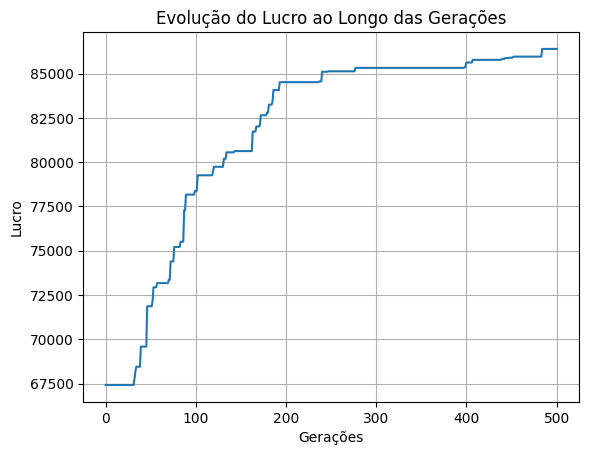

In [71]:
# Execução do algoritmo
melhores = alg_genetico(500, 50)

# Extração dos valores de lucro dos melhores cromossomos
lucros = [lucro for lucro, cromossomo in melhores]

# Criação do gráfico de linhas
plt.plot(lucros)
plt.xlabel('Gerações')
plt.ylabel('Lucro')
plt.title('Evolução do Lucro ao Longo das Gerações')
plt.grid(True)
plt.show()

In [72]:
max(melhores)

(86395.1167193695,
 [44274.91740219857,
  38705.36285437741,
  29440.666158615164,
  19748.96528664161,
  23839.961404123555,
  34637.80632822637])